# Ejemplos DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## DBSCAN con dataset aleatorio (blobs)



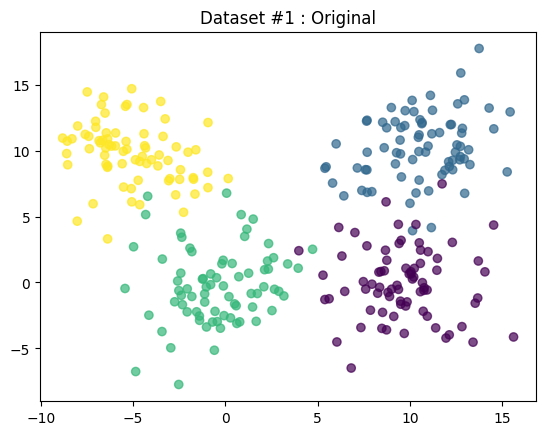

In [17]:
X1, label1 = make_blobs(n_samples=300,      # Genera 200 puntos en total
                        n_features=2,       # Cada punto tiene 2 coordenadas (x, y)
                        centers=[[10,0], [10,10], [0, 0], [-5, 10]],          # Queremos que los puntos se agrupen en 4 centros
                        cluster_std=2.5,      # Dispersión
                        random_state=45)    # Semilla para que el resultado sea siempre el mismo

plt.scatter(X1[:,0], X1[:,1], c=label1, alpha=0.7)
plt.title('Dataset #1 : Original') # Pone un título al gráfico.
plt.show()

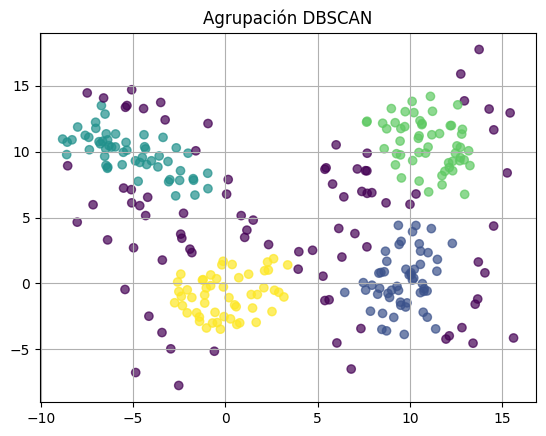

In [21]:
# Ejecutamos DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
# dbscan = DBSCAN(eps=1, min_samples=5) # eps -> radio, min_samples -> puntos mínimos
dbscan_labels = dbscan.fit_predict(X1) # Etiqueta 0 (morado en el plot) es el ruido

plt.scatter(X1[:,0], X1[:,1], c=dbscan_labels, alpha=0.7)
plt.title('Agrupación DBSCAN')
plt.grid(True)
plt.show()



## DBSCAN con dataset aleatorio (moons)






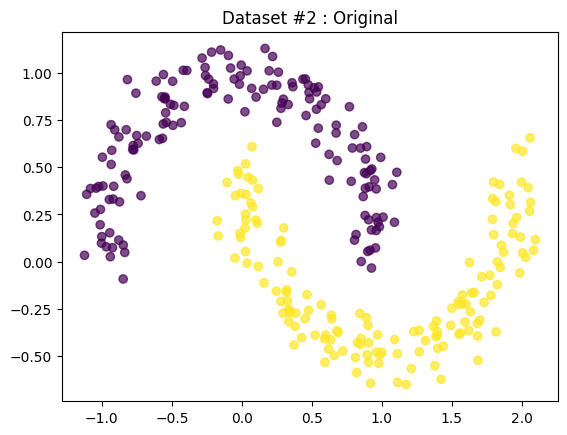

In [33]:
from sklearn.datasets import make_moons
X2,label2 = make_moons(n_samples=300, noise=0.1, random_state=123)
plt.scatter(X2[:,0], X2[:,1], c=label2, alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

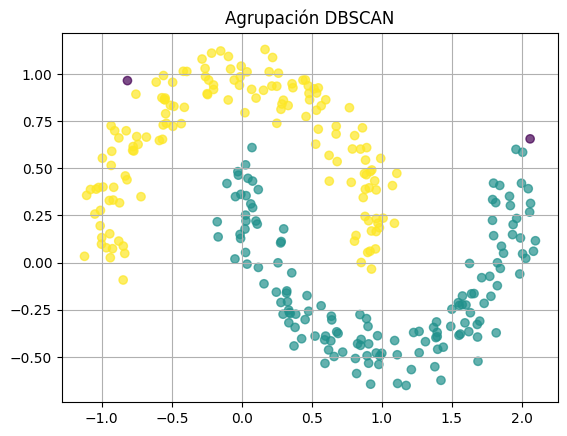

In [38]:
# dbscan2 = DBSCAN(eps=1.5, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
dbscan = DBSCAN(eps=0.2, min_samples=8) # eps -> radio, min_samples -> puntos mínimos
dbscan_labels2 = dbscan.fit_predict(X2) # Etiqueta 0 (morado en el plot) es el ruido

plt.scatter(X2[:,0], X2[:,1], c=dbscan_labels2, alpha=0.7)
plt.title('Agrupación DBSCAN')
plt.grid(True)
plt.show()

## DBSCAN con dataset iris (flores)

Nos basamos en el ejemplo 2 de[texto del enlace](https://) agrupación aglomerativa o el ejemplo 3 de Kmeans

Hay que pasarle el DBSCAN al dataset entero y mostrar la clasificación real vs clusters generados por el algoritmo. Ajustamos eps y min_samples


In [42]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Establecemos correlación entre número de etiqueta y nombre de columnas
iris_data_pd.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


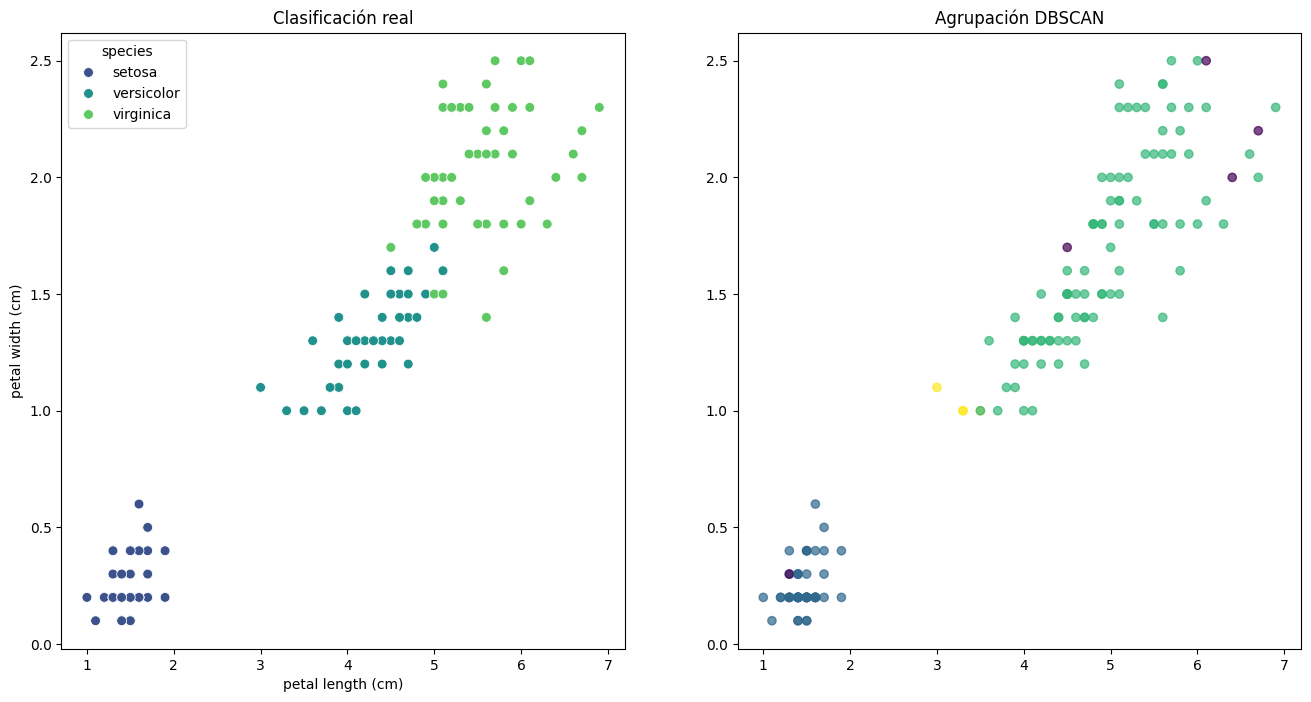

In [48]:
dbscan_iris = DBSCAN(eps=0.6, min_samples=3)
dbscan_iris_labels = dbscan_iris.fit_predict(iris.data)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(iris_data_pd['petal length (cm)'], iris_data_pd['petal width (cm)'], c=dbscan_iris_labels, alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()

Vamos a normalizar los datos

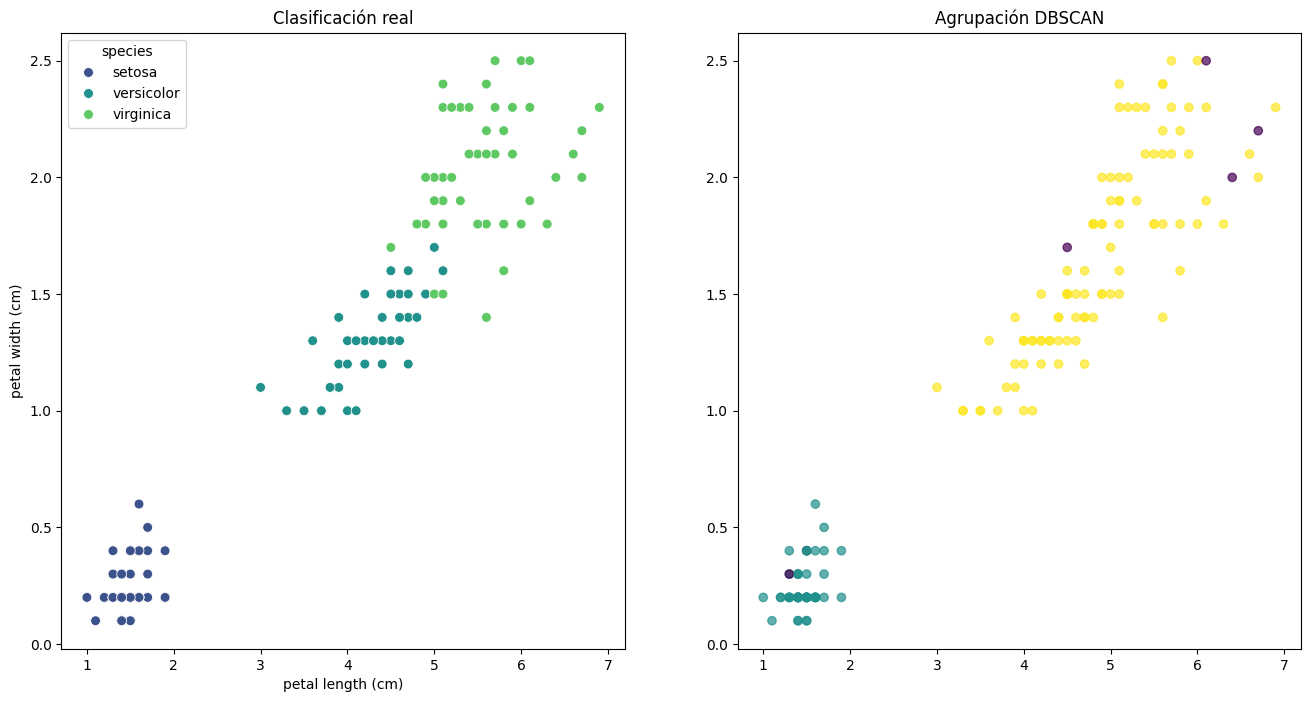

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(iris_data_pd.iloc[:, 0:4])

dbscan_iris_norm = DBSCAN(eps=0.7, min_samples=5)
dbscan_iris_norm_labels = dbscan_iris_norm.fit_predict(datos_normalizados) # Ejecutamos DBSCAN con los datos normalizados

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(iris_data_pd['petal length (cm)'], iris_data_pd['petal width (cm)'], c=dbscan_iris_norm_labels, alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()


## DBSCAN con dataset pingüinos


In [61]:
penguins = sns.load_dataset('penguins')
# Pequeño preprocesamiento para eliminar filas con datos faltantes
penguins_clean = penguins.dropna() # Borra filas que no tengan datos para alguna columna
data = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Gentoo
340,46.8,14.3,215.0,4850.0,Gentoo
341,50.4,15.7,222.0,5750.0,Gentoo
342,45.2,14.8,212.0,5200.0,Gentoo


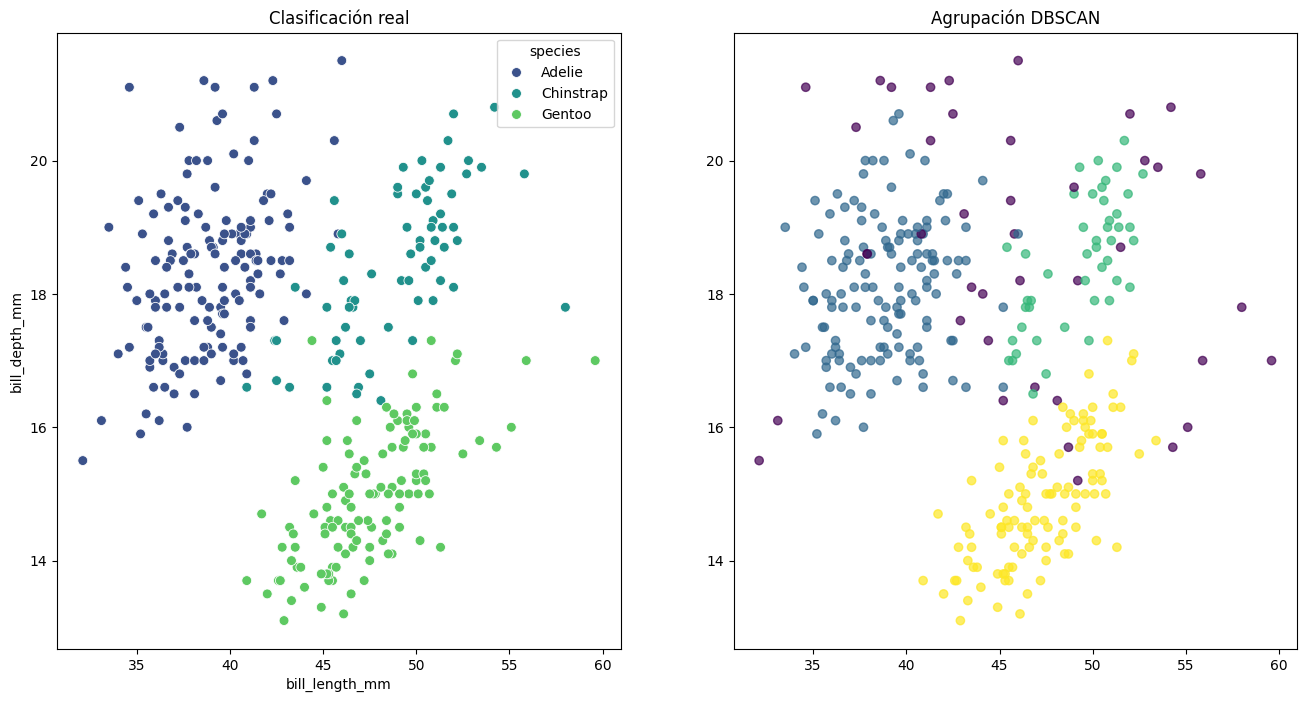

In [77]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(data.iloc[:, 0:4])

dbscan_norm = DBSCAN(eps=0.6, min_samples=7)
dbscan_norm_labels = dbscan_norm.fit_predict(datos_normalizados)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(data['bill_length_mm'], data['bill_depth_mm'], c=dbscan_norm_labels, alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
ari = adjusted_rand_score(data['species'], dbscan_norm_labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.7578


Eliminamos los puntos de ruido (label == -1)

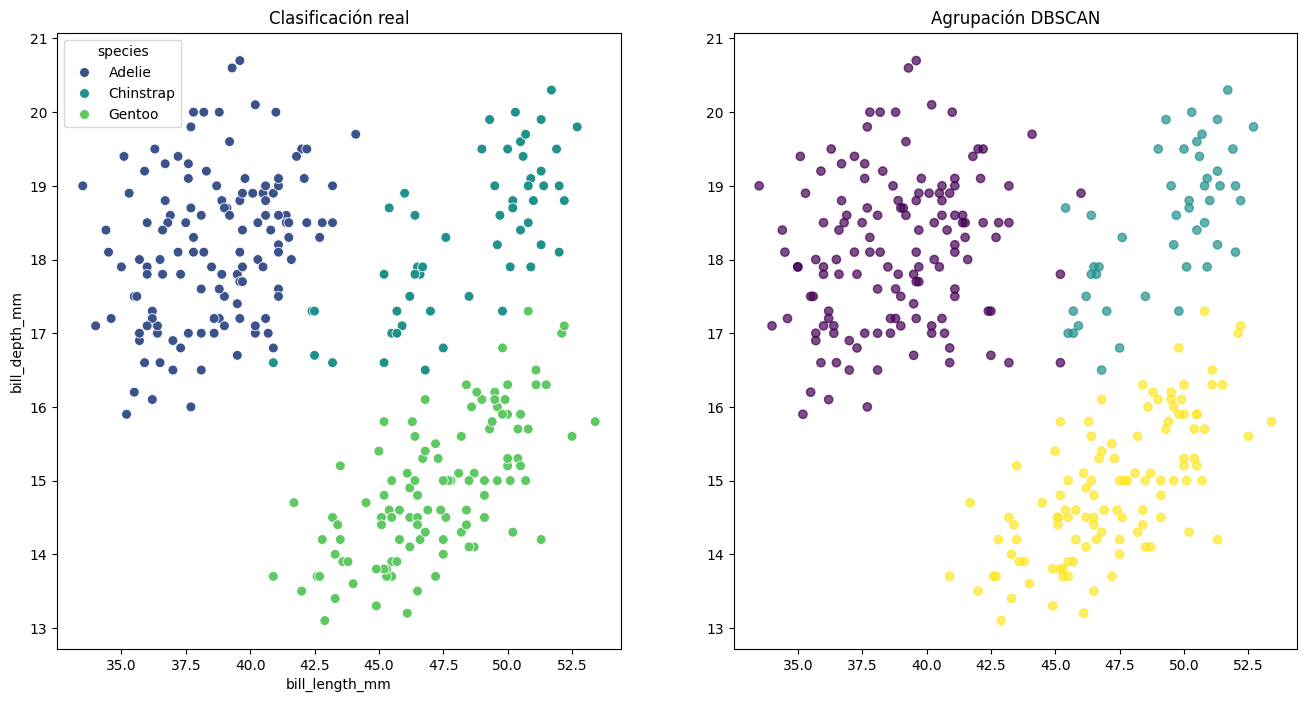

In [88]:
data.loc[:, ('dbscan')] = dbscan_norm_labels
data_sin_ruido = data[data['dbscan'] != -1]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=data_sin_ruido, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(data_sin_ruido['bill_length_mm'], data_sin_ruido['bill_depth_mm'], c=data_sin_ruido['dbscan'], alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
ari = adjusted_rand_score(data_sin_ruido['species'], data_sin_ruido['dbscan'])
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.9304


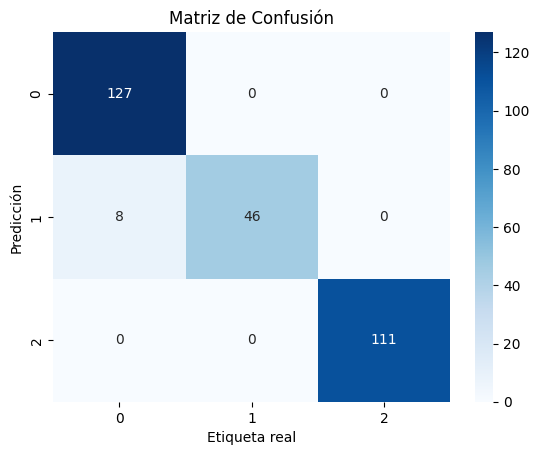

In [93]:
labels_num = data_sin_ruido['species'].astype('category').cat.codes
labels_num

cm = pd.crosstab(data_sin_ruido['species'], data_sin_ruido['dbscan'], rownames=['Canal real'], colnames=['Canal Predicho'])
cm

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Etiqueta real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

## DBSCAN con dataset Geysers



In [94]:
geyser_data = sns.load_dataset('geyser')
geyser_data

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


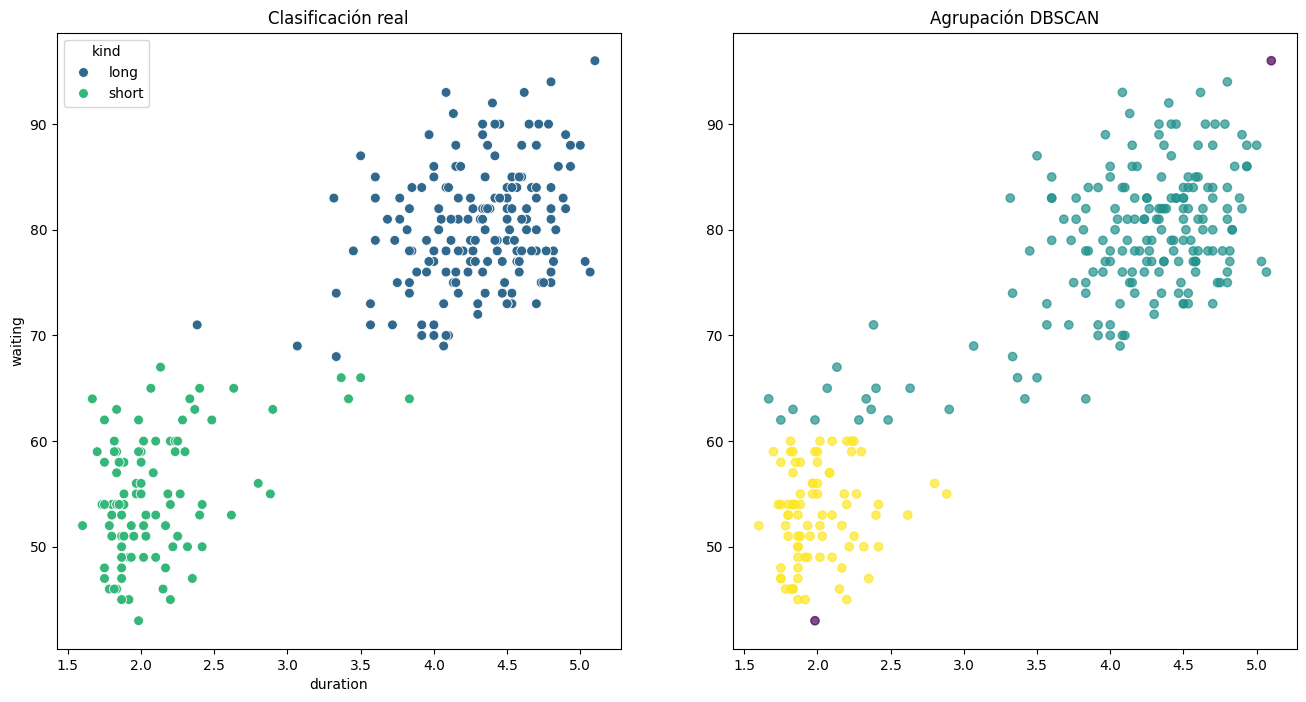

In [124]:
dbscan = DBSCAN(eps=1.95, min_samples=4)
dbscan_labels = dbscan.fit_predict(geyser_data.iloc[:, 0:2])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=geyser_data, x='duration', y='waiting', hue='kind', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(geyser_data['duration'], geyser_data['waiting'], c=dbscan_labels, alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()

Normalizamos datos. Ya que el tiempo de espera es unas 10 veces más grande que el tiempo de erupción

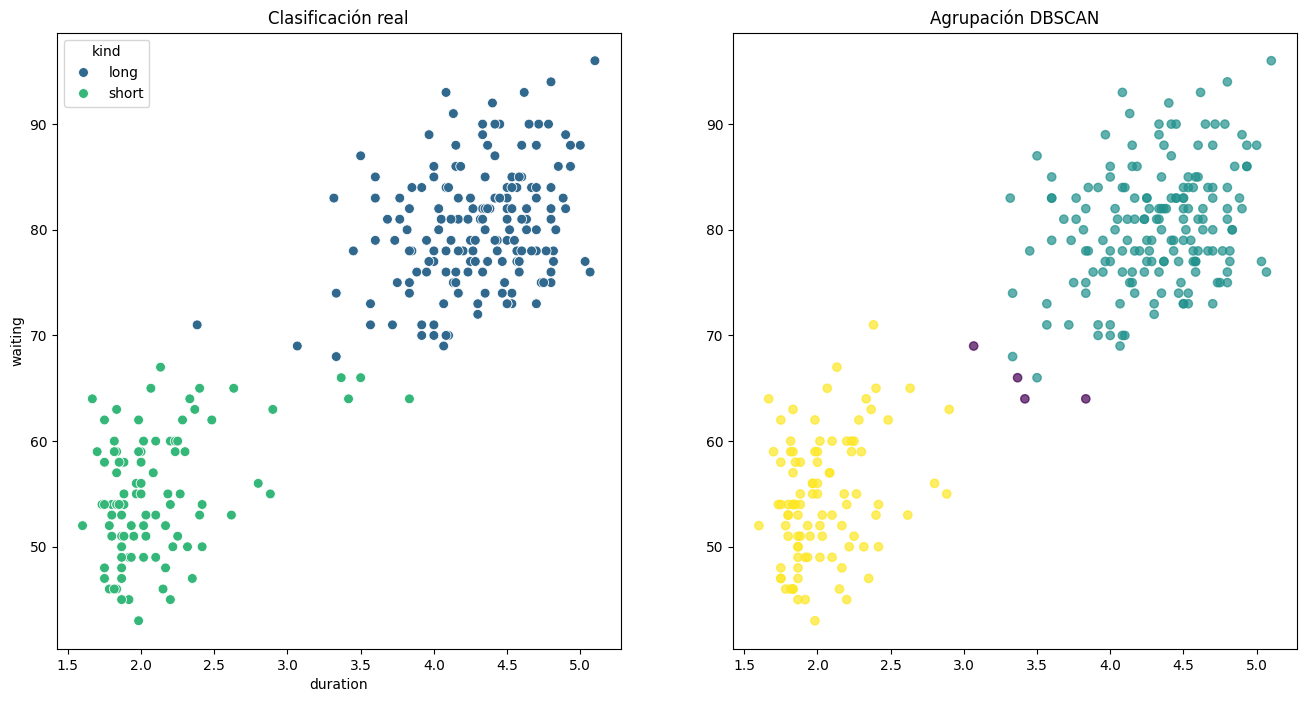

In [116]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(geyser_data.iloc[:, 0:2])

dbscan_norm = DBSCAN(eps=0.4, min_samples=7)
dbscan_norm_labels = dbscan_norm.fit_predict(datos_normalizados)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=geyser_data, x='duration', y='waiting', hue='kind', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por DBSCAN
axes[1].scatter(geyser_data['duration'], geyser_data['waiting'], c=dbscan_norm_labels, alpha=0.7)
axes[1].set_title('Agrupación DBSCAN')

plt.show()